In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
input_1 = np.array([
    -1,-1,-1,-1,-1,-1,1,
    -1,-1,-1,-1,-1,-1,1,
    1,1,1,1,1,1,1,
    1,-1,-1,1,-1,-1,-1,
    1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
])

input_2 = np.array([
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,1,1,1,1,1,1,
    -1,-1,-1,-1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
])


input_3 = np.array([
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,1,1,1,1,1,1,
])


output_1 = np.array([
    -1,-1,1,
    1,1,1,
    1,1,-1,
    -1,1,-1,
    -1,1,-1,
])

output_2 = np.array([
    1,-1,1,
    1,-1,1,
    1,1,1,
    -1,-1,-1,
    -1,1,-1
])

output_3 = np.array([
    1,-1,1,
    1,-1,1,
    1,1,1,
    1,-1,1,
    1,1,1
])


In [3]:
N = 3
letters = ["آ", "ب", "ن"]

In [4]:
in1 = np.transpose([input_1])
out1 = np.transpose([output_1], (0, 1))

in2 = np.transpose([input_2])
out2 = np.transpose([output_2], (0, 1))

in3 = np.transpose([input_3])
out3 = np.transpose([output_3], (0, 1))

In [5]:
inputs = [in1, in2, in3]
outputs = [out1, out2, out3]

In [6]:
def Activation(y):
  out = 0
  if (y > 0):
    out = 1
  else:
      out = -1
  return out


In [7]:
def weight_matrix(ins, out):
  n = np.size(ins[0], axis = 0)
  m = np.size(out[0], axis = 1)
  W = np.zeros((n, m))
  for i in range(N):
    W = W + np.dot(ins[i], out[i])
  return W

In [8]:
weight = weight_matrix(inputs, outputs)
print(weight.shape)

(63, 15)


In [9]:
def Hebbian(ins, out, weight):
  n = np.size(ins[0], axis = 0)
  m = np.size(out[0], axis = 1)
  test_output = np.zeros((N, 1, m))
  for i in range(N):
    S = np.transpose(ins[i])
    Y = np.dot(S, weight)
    for k in range(np.size(Y, axis = 1)):
      test_output[i][0][k] = Activation(Y[0, k])
  return test_output

In [10]:
new_output1 = np.array([1, -1, -1, 1])
small_out1 = np.transpose([new_output1], (0, 1))
new_output2 = np.array([1, 1, -1, -1])
small_out2 = np.transpose([new_output2], (0, 1))
new_output3 = np.array([1, 1, 1, -1])
small_out3 = np.transpose([new_output3], (0, 1))
small_outs = [small_out1, small_out2, small_out3]

Text(0.5, 0.98, 'new small outputs')

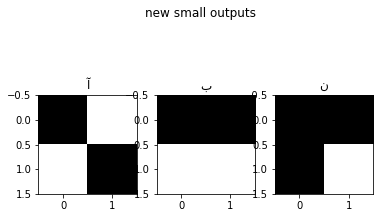

In [11]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(new_output1.reshape(2, 2), cmap = "Greys")
ax[0].set_title(letters[0])

ax[1].imshow(new_output2.reshape(2, 2), cmap = "Greys")
ax[1].set_title(letters[1])

ax[2].imshow(new_output3.reshape(2, 2), cmap = "Greys")
ax[2].set_title(letters[2])
fig.suptitle("new small outputs")

In [12]:
new_weight = weight_matrix(inputs, small_outs)
new_weight.shape

(63, 4)

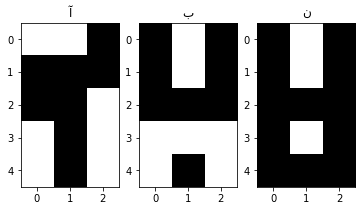

In [13]:
#original outputs
y = Hebbian(inputs, outputs, weight)
final_output = [[] for i in range(N)]
fig, ax = plt.subplots(1, 3, figsize=(6, 6))
for i in range(N):
  final_output[i] = y[i].reshape(5, 3)
  ax[i].imshow(final_output[i], cmap='Greys')
  ax[i].set_title(letters[i])
plt.show()


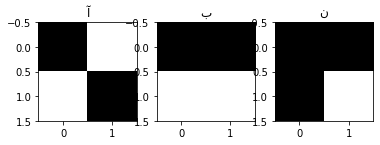

In [14]:
y = Hebbian(inputs, small_outs, new_weight)
final_output = [[] for i in range(N)]
fig, ax = plt.subplots(1, 3, figsize=(6, 6))
for i in range(N):
  final_output[i] = y[i].reshape(2, 2)
  ax[i].imshow(final_output[i], cmap='Greys')
  ax[i].set_title(letters[i])
plt.show()

In [15]:
def flip(input, idx):
  l = len(idx)
  out = np.copy(input)
  for i in range(l):
    out[idx[i]] = input[idx[i]]*-1
  return out

In [16]:

def noisy_input(input, f):
  N = len(input)
  out = input.copy()
  n = int((63*f)/100)
  for i in range(N):
    idx = random.sample(range(63), n)
    out[i] = flip(input[i], idx)
  return out

In [17]:
def zero(input, idx):
  l = len(idx)
  out = np.copy(input)
  for i in range(l):
    out[idx[i]] = 0
  return out

In [18]:
def mis_input(input, f):
  N = len(input)
  out = input.copy()
  n = int((63*f)/100)
  for i in range(N):
    idx = random.sample(range(63), n)
    out[i] = zero(input[i], idx)
  return out


In [19]:
def mean_accuracy(list):
  sum = 0
  for i in list:
    sum = sum + i
  accuracy = sum/(len(list))
  return accuracy

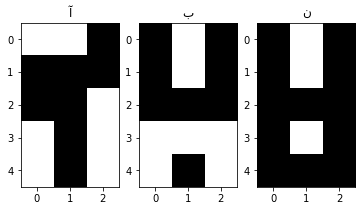

In [20]:
accuracy1_a = []
accuracy1_b = []
accuracy1_n = []
for i in range(100):
  new_input = noisy_input(inputs, 20)
  y = Hebbian(new_input, outputs, weight)
  accuracy1_a.append((np.sum(y[0] == outputs[0])/15)*100)
  accuracy1_b.append((np.sum(y[1] == outputs[1])/15)*100)
  accuracy1_n.append((np.sum(y[2] == outputs[2])/15)*100)

noisy_final = [[] for i in range(N)]
fig, ax = plt.subplots(1, 3, figsize=(6, 6))
for i in range(N):
  noisy_final[i] = y[i].reshape(5, 3)
  ax[i].imshow(noisy_final[i], cmap = 'Greys')
  ax[i].set_title(letters[i])
plt.show()

In [21]:
print('Accuracy percentages for original outpus (20% noise):')
print(f'Accuracy percentage for 20% noise for "آ" is = {mean_accuracy(accuracy1_a)}')
print(f'Accuracy percentage for 20% noise for "ب" is = {mean_accuracy(accuracy1_b)}')
print(f'Accuracy percentage for 20% noise for "ن" is = {mean_accuracy(accuracy1_n)}')

Accuracy percentages for original outpus (20% noise):
Accuracy percentage for 20% noise for "آ" is = 99.46666666666665
Accuracy percentage for 20% noise for "ب" is = 100.0
Accuracy percentage for 20% noise for "ن" is = 96.26666666666668


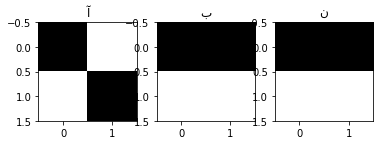

In [22]:
Saccuracy1_a = []
Saccuracy1_b = []
Saccuracy1_n = []
for i in range(100):
  new_input = noisy_input(inputs, 20)
  y = Hebbian(new_input, small_outs, new_weight)
  Saccuracy1_a.append((np.sum(y[0] == small_outs[0])/4)*100)
  Saccuracy1_b.append((np.sum(y[1] == small_outs[1])/4)*100)
  Saccuracy1_n.append((np.sum(y[2] == small_outs[2])/4)*100)

noisy_final = [[] for i in range(N)]
fig, ax = plt.subplots(1, 3, figsize=(6, 6))
for i in range(N):
  noisy_final[i] = y[i].reshape(2, 2)
  ax[i].imshow(noisy_final[i], cmap = 'Greys')
  ax[i].set_title(letters[i])
plt.show()

In [23]:
print('Accuracy percentages for small outpus (20% noise):')
print(f'Accuracy percentage for 20% noise for "آ" is = {mean_accuracy(Saccuracy1_a)}')
print(f'Accuracy percentage for 20% noise for "ب" is = {mean_accuracy(Saccuracy1_b)}')
print(f'Accuracy percentage for 20% noise for "ن" is = {mean_accuracy(Saccuracy1_n)}')

Accuracy percentages for small outpus (20% noise):
Accuracy percentage for 20% noise for "آ" is = 98.5
Accuracy percentage for 20% noise for "ب" is = 100.0
Accuracy percentage for 20% noise for "ن" is = 96.0


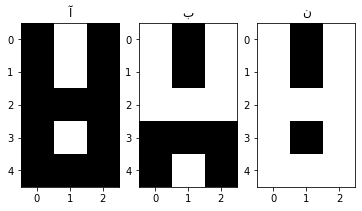

In [24]:
accuracy2_a = []
accuracy2_b = []
accuracy2_n = []
for i in range(100):
  new_input = noisy_input(inputs, 60)
  y = Hebbian(new_input, outputs, weight)
  accuracy2_a.append((np.sum(y[0] == outputs[0])/15)*100)
  accuracy2_b.append((np.sum(y[1] == outputs[1])/15)*100)
  accuracy2_n.append((np.sum(y[2] == outputs[2])/15)*100)

noisy_final = [[] for i in range(N)]
fig, ax = plt.subplots(1, 3, figsize=(6, 6))
for i in range(N):
  noisy_final[i] = y[i].reshape(5, 3)
  ax[i].imshow(noisy_final[i], cmap = 'Greys')
  ax[i].set_title(letters[i])
plt.show()

In [25]:
print('Accuracy percentages for original outpus (60% noise):')
print(f'Accuracy percentage for 60% noise for "آ" is = {mean_accuracy(accuracy2_a)}')
print(f'Accuracy percentage for 60% noise for "ب" is = {mean_accuracy(accuracy2_b)}')
print(f'Accuracy percentage for 60% noise for "ن" is = {mean_accuracy(accuracy2_n)}')

Accuracy percentages for original outpus (60% noise):
Accuracy percentage for 60% noise for "آ" is = 16.266666666666673
Accuracy percentage for 60% noise for "ب" is = 5.866666666666667
Accuracy percentage for 60% noise for "ن" is = 17.333333333333346


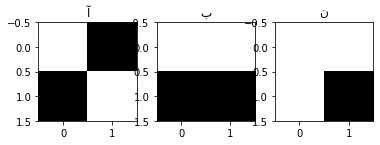

In [26]:
Saccuracy2_a = []
Saccuracy2_b = []
Saccuracy2_n = []
for i in range(100):
  new_input = noisy_input(inputs, 60)
  y = Hebbian(new_input, small_outs, new_weight)
  Saccuracy2_a.append((np.sum(y[0] == small_outs[0])/4)*100)
  Saccuracy2_b.append((np.sum(y[1] == small_outs[1])/4)*100)
  Saccuracy2_n.append((np.sum(y[2] == small_outs[2])/4)*100)

noisy_final = [[] for i in range(N)]
fig, ax = plt.subplots(1, 3, figsize=(6, 6))
for i in range(N):
  noisy_final[i] = y[i].reshape(2, 2)
  ax[i].imshow(noisy_final[i], cmap = 'Greys')
  ax[i].set_title(letters[i])
plt.show()

In [27]:
print('Accuracy percentages for small outpus (60% noise):')
print(f'Accuracy percentage for 60% noise for "آ" is = {mean_accuracy(Saccuracy2_a)}')
print(f'Accuracy percentage for 60% noise for "ب" is = {mean_accuracy(Saccuracy2_b)}')
print(f'Accuracy percentage for 60% noise for "ن" is = {mean_accuracy(Saccuracy2_n)}')

Accuracy percentages for small outpus (60% noise):
Accuracy percentage for 60% noise for "آ" is = 18.0
Accuracy percentage for 60% noise for "ب" is = 12.0
Accuracy percentage for 60% noise for "ن" is = 15.25


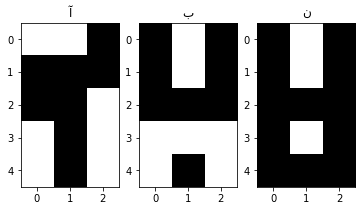

In [28]:
accuracy3_a = []
accuracy3_b = []
accuracy3_n = []
for i in range(100):
  new_input = mis_input(inputs, 20)
  y = Hebbian(new_input, outputs, weight)
  accuracy3_a.append((np.sum(y[0] == outputs[0])/15)*100)
  accuracy3_b.append((np.sum(y[1] == outputs[1])/15)*100)
  accuracy3_n.append((np.sum(y[2] == outputs[2])/15)*100)

miss_final = [[] for i in range(N)]
fig, ax = plt.subplots(1, 3, figsize=(6, 6))
for i in range(N):
  miss_final[i] = y[i].reshape(5, 3)
  ax[i].imshow(miss_final[i], cmap = 'Greys')
  ax[i].set_title(letters[i])
plt.show()

In [29]:
print('Accuracy percentages for original outpus (20% missing):')
print(f'Accuracy percentage for 20% missing for "آ" is = {mean_accuracy(accuracy3_a)}')
print(f'Accuracy percentage for 20% missing for "ب" is = {mean_accuracy(accuracy3_b)}')
print(f'Accuracy percentage for 20% missing for "ن" is = {mean_accuracy(accuracy3_n)}')


Accuracy percentages for original outpus (20% missing):
Accuracy percentage for 20% missing for "آ" is = 100.0
Accuracy percentage for 20% missing for "ب" is = 100.0
Accuracy percentage for 20% missing for "ن" is = 100.0


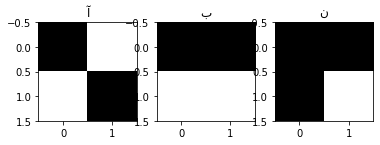

In [30]:
Saccuracy3_a = []
Saccuracy3_b = []
Saccuracy3_n = []
for i in range(100):
  new_input = mis_input(inputs, 20)
  y = Hebbian(new_input, small_outs, new_weight)
  Saccuracy3_a.append((np.sum(y[0] == small_outs[0])/4)*100)
  Saccuracy3_b.append((np.sum(y[1] == small_outs[1])/4)*100)
  Saccuracy3_n.append((np.sum(y[2] == small_outs[2])/4)*100)

miss_final = [[] for i in range(N)]
fig, ax = plt.subplots(1, 3, figsize=(6, 6))
for i in range(N):
  miss_final[i] = y[i].reshape(2, 2)
  ax[i].imshow(miss_final[i], cmap = 'Greys')
  ax[i].set_title(letters[i])
plt.show()

In [31]:
print('Accuracy percentages for small outpus (20% missing):')
print(f'Accuracy percentage for 20% missing for "آ" is = {mean_accuracy(Saccuracy3_a)}')
print(f'Accuracy percentage for 20% missing for "ب" is = {mean_accuracy(Saccuracy3_b)}')
print(f'Accuracy percentage for 20% missing for "ن" is = {mean_accuracy(Saccuracy3_n)}')

Accuracy percentages for small outpus (20% missing):
Accuracy percentage for 20% missing for "آ" is = 100.0
Accuracy percentage for 20% missing for "ب" is = 100.0
Accuracy percentage for 20% missing for "ن" is = 99.75


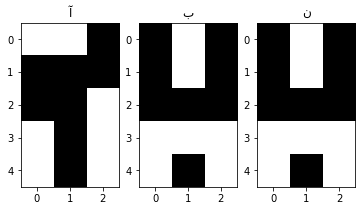

In [32]:
accuracy4_a = []
accuracy4_b = []
accuracy4_n = []
for i in range(100):
  new_input = mis_input(inputs, 60)
  y = Hebbian(new_input, outputs, weight)
  accuracy4_a.append((np.sum(y[0] == outputs[0])/15)*100)
  accuracy4_b.append((np.sum(y[1] == outputs[1])/15)*100)
  accuracy4_n.append((np.sum(y[2] == outputs[2])/15)*100)

miss_final = [[] for i in range(N)]
fig, ax = plt.subplots(1, 3, figsize=(6, 6))
for i in range(N):
  miss_final[i] = y[i].reshape(5, 3)
  ax[i].imshow(miss_final[i], cmap = 'Greys')
  ax[i].set_title(letters[i])
plt.show()

In [33]:
print('Accuracy percentages for original outpus (60% missing):')
print(f'Accuracy percentage for 60% missing for "آ" is = {mean_accuracy(accuracy4_a)}')
print(f'Accuracy percentage for 60% missing for "ب" is = {mean_accuracy(accuracy4_b)}')
print(f'Accuracy percentage for 60% missing for "ن" is = {mean_accuracy(accuracy4_n)}')

Accuracy percentages for original outpus (60% missing):
Accuracy percentage for 60% missing for "آ" is = 98.8
Accuracy percentage for 60% missing for "ب" is = 100.0
Accuracy percentage for 60% missing for "ن" is = 91.73333333333332


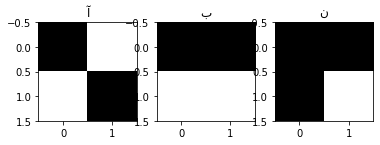

In [34]:
Saccuracy4_a = []
Saccuracy4_b = []
Saccuracy4_n = []
for i in range(100):
  new_input = mis_input(inputs, 20)
  y = Hebbian(new_input, small_outs, new_weight)
  Saccuracy4_a.append((np.sum(y[0] == small_outs[0])/4)*100)
  Saccuracy4_b.append((np.sum(y[1] == small_outs[1])/4)*100)
  Saccuracy4_n.append((np.sum(y[2] == small_outs[2])/4)*100)

miss_final = [[] for i in range(N)]
fig, ax = plt.subplots(1, 3, figsize=(6, 6))
for i in range(N):
  miss_final[i] = y[i].reshape(2, 2)
  ax[i].imshow(miss_final[i], cmap = 'Greys')
  ax[i].set_title(letters[i])
plt.show()

In [35]:
print('Accuracy percentages for small outpus (60% missing):')
print(f'Accuracy percentage for 20% missing for "آ" is = {mean_accuracy(Saccuracy4_a)}')
print(f'Accuracy percentage for 20% missing for "ب" is = {mean_accuracy(Saccuracy4_b)}')
print(f'Accuracy percentage for 20% missing for "ن" is = {mean_accuracy(Saccuracy4_n)}')

Accuracy percentages for small outpus (60% missing):
Accuracy percentage for 20% missing for "آ" is = 100.0
Accuracy percentage for 20% missing for "ب" is = 100.0
Accuracy percentage for 20% missing for "ن" is = 100.0
